## Assignment. 산악지형 기상 정보 대비 Burned Area에 대한 EDA및 Regression을 활용한 예측

- 데이터 집합 소스
    - 설명: https://archive.ics.uci.edu/ml/datasets/Forest+Fires
        - Features
               - 1: X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
               - 2: Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
               - 3: month - month of the year: 'jan' to 'dec'
               - 4: day - day of the week: 'mon' to 'sun'
               - 5: FFMC - FFMC index from the FWI system: 18.7 to 96.20
               - 6: DMC - DMC index from the FWI system: 1.1 to 291.3
               - 7: DC - DC index from the FWI system: 7.9 to 860.6
               - 8: ISI - ISI index from the FWI system: 0.0 to 56.10
               - 9: temp - temperature in Celsius degrees: 2.2 to 33.30
               - 10: RH - relative humidity in %: 15.0 to 100
               - 11: wind - wind speed in km/h: 0.40 to 9.40
               - 12: rain - outside rain in mm/m2 : 0.0 to 6.4
          - Target
               - area - the burned area of the forest (in ha): 0.00 to 1090.84

In [1]:
import urllib2
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv'
raw_csv = urllib2.urlopen(path)
feature_names = ('X', 'Y', 'month', 'day', "FFMC", "DMC", 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain')
target_name = 'area'
all_names = feature_names + (target_name,)
df = pd.read_csv(raw_csv)

In [2]:
print df.head(5)

print

print df[140:145]

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  area
140  2  5   sep  mon  90.9  126.5  686.5   7.0  21.9  39   1.8   0.0  0.47
141  1  2   aug  wed  95.5   99.9  513.3  13.2  23.3  31   4.5   0.0  0.55
142  8  6   aug  fri  90.1  108.0  529.8  12.5  21.2  51   8.9   0.0  0.61
143  1  2   jul  sat  90.0   51.3  296.3   8.7  16.6  53   5.4   0.0  0.71
144  2  5   aug  wed  95.5   99.9  513.3  13.2  23.8  32   5.4   0.0  0.77


## [Mission 1] 불이 가장 많이 발생한 지역 좌표 (X, Y) 상위 5개를 제시하시오.

 - numpy 및 pandas에서 제공되는 groupby, sum, stack, sort 등의 메소드 활용 필요

In [3]:
sdf = df[['X', 'Y', 'area']]
print sdf.head(5)
print 
print sdf[140:145]

   X  Y  area
0  7  5   0.0
1  7  4   0.0
2  7  4   0.0
3  8  6   0.0
4  8  6   0.0

     X  Y  area
140  2  5  0.47
141  1  2  0.55
142  8  6  0.61
143  1  2  0.71
144  2  5  0.77


Solve : X,Y value를 바탕으로 groupby를 한 후 각 그룹별 데이터 수('area' index의 데이터)를 count(), count 된 dataframe을 sorting

In [4]:
grouped = sdf.groupby(['X','Y'])

In [5]:
grouped_counted = grouped.count()

In [6]:
grouped_counted

area
X Y      
1 2    19
  3    10
  4    15
  5     4
2 2    25
  3     1
  4    27
  5    20
3 3     1
  4    43
  5     7
  6     4
4 3    22
  4    36
  5    25
  6     8
5 4    23
  5     3
  6     4
6 3    25
  4     9
  5    49
  6     3
7 3     2
  4    45
  5    11
  6     2
8 3     3
  4     1
  5     4
  6    52
  8     1
9 4     4
  5     2
  6     1
  9     6

각각의 좌표 그룹별로 데이터가 있는 회수가 정리

In [7]:
grouped_counted.sort_values('area',ascending = False).head(5)

,,area
X,Y,
8,6,52
6,5,49
7,4,45
3,4,43
4,4,36


## [Mission 2] 불이 가장 많이 발생한 월(month) 상위 2개 및 가장 많이 발생한 날(day) 상위 2개를 제시하시오.

- numpy 및 apndas에서 제공되는 groupby, sum, stack, sort 등의 메소드 필요

In [8]:
sdf = df[['month','day' ,'area']]
print sdf.head()
print
print sdf[140:145]

  month  day  area
0   mar  fri   0.0
1   oct  tue   0.0
2   oct  sat   0.0
3   mar  fri   0.0
4   mar  sun   0.0

    month  day  area
140   sep  mon  0.47
141   aug  wed  0.55
142   aug  fri  0.61
143   jul  sat  0.71
144   aug  wed  0.77


In [9]:
grouped = sdf.groupby(['month'])

In [10]:
grouped.count().sort_values('area',ascending = False).head(2)

,day,area
month,,
aug,184,184
sep,172,172


In [11]:
grouped = sdf.groupby(['month','day'])

In [12]:
grouped.count().sort_values('area',ascending = False).head(2)

,,area
month,day,
aug,sun,40
sep,fri,38


## [ Mission 3]  4대 주 요인(temp, RH, wind, rain) 속성별 기본 통계치 및 Box Plot 산출

In [13]:
sdf = df[['temp', 'RH', 'wind', 'rain']]
print sdf.head()

   temp  RH  wind  rain
0   8.2  51   6.7   0.0
1  18.0  33   0.9   0.0
2  14.6  33   1.3   0.0
3   8.3  97   4.0   0.2
4  11.4  99   1.8   0.0


In [14]:
sdf.describe()

,temp,RH,wind,rain
count,517.000000,517.000000,517.000000,517.000000
mean,18.889168,44.288201,4.017602,0.021663
std,5.806625,16.317469,1.791653,0.295959
min,2.200000,15.000000,0.400000,0.000000
25%,15.500000,33.000000,2.700000,0.000000
50%,19.300000,42.000000,4.000000,0.000000
75%,22.800000,53.000000,4.900000,0.000000
max,33.300000,100.000000,9.400000,6.400000


C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0xaa07160>],
 'caps': [<matplotlib.lines.Line2D at 0xaa07da0>,
 'fliers': [<matplotlib.lines.Line2D at 0xb90ae48>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xb90a8d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0xaa07320>,
  <matplotlib.lines.Line2D at 0xaa07828>]}

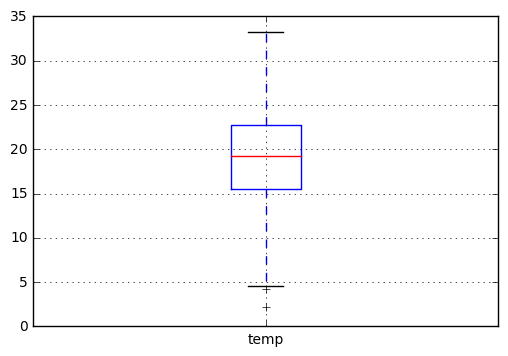

In [15]:
sdf.boxplot('temp')

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0xb6cbe48>],
 'caps': [<matplotlib.lines.Line2D at 0xb6dbac8>,
 'fliers': [<matplotlib.lines.Line2D at 0xb6eab70>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xb6ea5f8>],
 'whiskers': [<matplotlib.lines.Line2D at 0xb6db048>,
  <matplotlib.lines.Line2D at 0xb6cbb70>]}

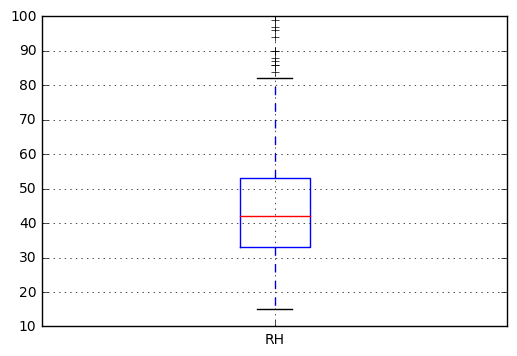

In [16]:
sdf.boxplot('RH')

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0xbbab748>],
 'caps': [<matplotlib.lines.Line2D at 0xbbba630>,
 'fliers': [<matplotlib.lines.Line2D at 0xbbc76d8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xbbc7160>],
 'whiskers': [<matplotlib.lines.Line2D at 0xbbaba90>,
  <matplotlib.lines.Line2D at 0xbbba0b8>]}

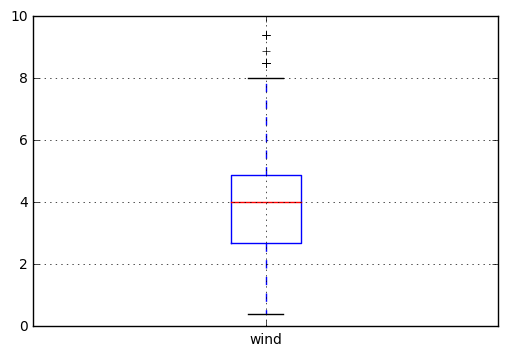

In [17]:
sdf.boxplot('wind')

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0xbe0d588>],
 'caps': [<matplotlib.lines.Line2D at 0xbe1c2e8>,
 'fliers': [<matplotlib.lines.Line2D at 0xbe29390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xbe1cdd8>],
 'whiskers': [<matplotlib.lines.Line2D at 0xbe0d748>,
  <matplotlib.lines.Line2D at 0xbe0dd30>]}

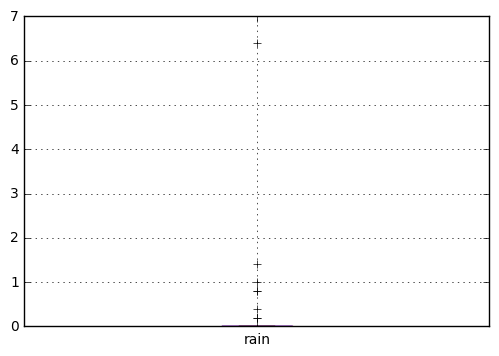

In [18]:
sdf.boxplot('rain')

- rain데이터의 평균값을 보면 0.2이고 대부분의(최소 75%) 데이터가 0.0의 값을 보이고 있고, 이상 데이터는 약 1% (Box plot 상에서 육안으로 확인되는 6번)인것으로 보아 강수량과 화재 여부는 음의 관계인것으로 판단된다.
- 대부분의 화재가 상온(15-25)에서 발생하였고 화재가 발생한 특별한 고온은 발견되지 않았다. 화재 발생에 있어서 온도가 큰 영향을 주지 않는것으로 판단된다.

## [Mission 4] 4대요인 및 area를 포함하여 dataframe을 얻어오고 area를 두 가지 부류로 나누어 각 4가지 속성을 비교 분석하기

- area의 값의 편차가 너무 심하기 떄문에 그러한 편차를 줄이기 위하여numpy.log1p(자연로그) 사용
    - Calualates log(1+x)
    - http://docs.scipy.org/doc/numpy/reference/generated/numpy.log1p.html#numpy.log1p
- 두 가지 부류로 나누는 기준은 log(1.area) 값이 50% percentile 이상인 것과 50% percentile 이하인 것으로 정함
    - 각각을 sdf_1.과 sdf_2라고 명명
- sdf_1및 sdf_2에 대하여 4대 주 요인(temp,RH,wind,rain) 속성별 기본 통계치 및 Box Plot 산출
    - descirbe() 가 제공하는 통꼐치 및 boxplot을 보면서 나름대로의 해석을 반드시 2가지 이상 제시하시오.

In [19]:
sdf = df[['temp', 'RH', 'wind', 'rain', 'area']]
print sdf.head()
print
print sdf[140:145]

   temp  RH  wind  rain  area
0   8.2  51   6.7   0.0   0.0
1  18.0  33   0.9   0.0   0.0
2  14.6  33   1.3   0.0   0.0
3   8.3  97   4.0   0.2   0.0
4  11.4  99   1.8   0.0   0.0

     temp  RH  wind  rain  area
140  21.9  39   1.8   0.0  0.47
141  23.3  31   4.5   0.0  0.55
142  21.2  51   8.9   0.0  0.61
143  16.6  53   5.4   0.0  0.71
144  23.8  32   5.4   0.0  0.77


In [20]:
log1p_val = np.log1p(sdf['area'])
sdf.loc[:, 'area'] = log1p_val
print sdf.head()
print
print sdf[140:145]

   temp  RH  wind  rain  area
0   8.2  51   6.7   0.0   0.0
1  18.0  33   0.9   0.0   0.0
2  14.6  33   1.3   0.0   0.0
3   8.3  97   4.0   0.2   0.0
4  11.4  99   1.8   0.0   0.0

     temp  RH  wind  rain      area
140  21.9  39   1.8   0.0  0.385262
141  23.3  31   4.5   0.0  0.438255
142  21.2  51   8.9   0.0  0.476234
143  16.6  53   5.4   0.0  0.536493
144  23.8  32   5.4   0.0  0.570980


C:\Program Files\Anaconda2\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [21]:
sdf.describe()

,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000
mean,18.889168,44.288201,4.017602,0.021663,1.111026
std,5.806625,16.317469,1.791653,0.295959,1.398436
min,2.200000,15.000000,0.400000,0.000000,0.000000
25%,15.500000,33.000000,2.700000,0.000000,0.000000
50%,19.300000,42.000000,4.000000,0.000000,0.418710
75%,22.800000,53.000000,4.900000,0.000000,2.024193
max,33.300000,100.000000,9.400000,6.400000,6.995620


In [22]:
sdf.area.median()

0.41871033485818504

In [23]:
sdf_1 = sdf[sdf.area >= sdf.area.median()]

In [24]:
print sdf_1.head()

print

print sdf_1[140:145]

     temp  RH  wind  rain      area
141  23.3  31   4.5   0.0  0.438255
142  21.2  51   8.9   0.0  0.476234
143  16.6  53   5.4   0.0  0.536493
144  23.8  32   5.4   0.0  0.570980
145  27.4  22   4.0   0.0  0.641854

     temp  RH  wind  rain      area
319  21.6  28   6.3   0.0  1.688249
320  18.9  34   7.2   0.0  3.565581
321  16.8  28   4.0   0.0  2.105353
322  16.8  28   4.0   0.0  0.698135
323  12.9  39   2.7   0.0  1.156881


In [25]:
sdf_2 = sdf[sdf.area < sdf.area.median()]

In [26]:
print sdf_2.head()

print

print sdf_2[140:145]

   temp  RH  wind  rain  area
0   8.2  51   6.7   0.0   0.0
1  18.0  33   0.9   0.0   0.0
2  14.6  33   1.3   0.0   0.0
3   8.3  97   4.0   0.2   0.0
4  11.4  99   1.8   0.0   0.0

     temp  RH  wind  rain      area
140  21.9  39   1.8   0.0  0.385262
239  13.4  75   1.8   0.0  0.000000
240  15.2  51   2.7   0.0  0.000000
241  16.7  20   3.1   0.0  0.000000
243  21.9  73   7.6   1.0  0.000000


In [27]:
sdf_1.describe()

,temp,RH,wind,rain,area
count,260.000000,260.000000,260.000000,260.000000,260.000000
mean,19.256923,43.696154,4.133462,0.030000,2.198902
std,6.269451,15.275462,1.899338,0.405969,1.226033
min,2.200000,15.000000,0.400000,0.000000,0.418710
25%,15.900000,32.750000,2.700000,0.000000,1.228844
50%,20.100000,41.000000,4.000000,0.000000,2.022208
75%,23.400000,53.000000,4.900000,0.000000,2.838020
max,33.300000,96.000000,9.400000,6.400000,6.995620


C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0xc276470>,
 'caps': [<matplotlib.lines.Line2D at 0xc2851d0>,
 'fliers': [<matplotlib.lines.Line2D at 0xc293278>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xc285cc0>,
 'whiskers': [<matplotlib.lines.Line2D at 0xc276630>,
  <matplotlib.lines.Line2D at 0xc053160>]}

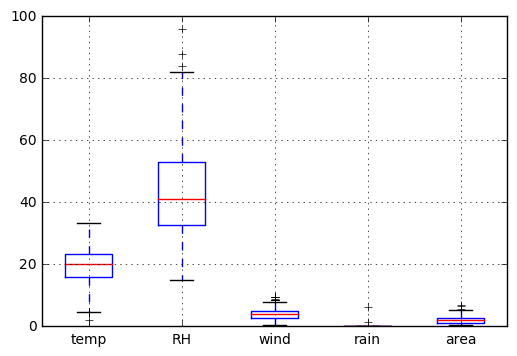

In [28]:
sdf_1.boxplot()

In [29]:
sdf_2.describe()

,temp,RH,wind,rain,area
count,257.000000,257.00000,257.000000,257.000000,257.000000
mean,18.517121,44.88716,3.900389,0.013230,0.010450
std,5.283718,17.31732,1.671229,0.098326,0.055369
min,4.200000,15.00000,0.900000,0.000000,0.000000
25%,15.400000,33.00000,2.700000,0.000000,0.000000
50%,18.700000,42.00000,3.600000,0.000000,0.000000
75%,21.700000,54.00000,5.400000,0.000000,0.000000
max,32.400000,100.00000,8.500000,1.000000,0.385262


C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0xc417b38>,
 'caps': [<matplotlib.lines.Line2D at 0xc427710>,
 'fliers': [<matplotlib.lines.Line2D at 0xc433940>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xc4333c8>,
 'whiskers': [<matplotlib.lines.Line2D at 0xc417cf8>,
  <matplotlib.lines.Line2D at 0xd435da0>]}

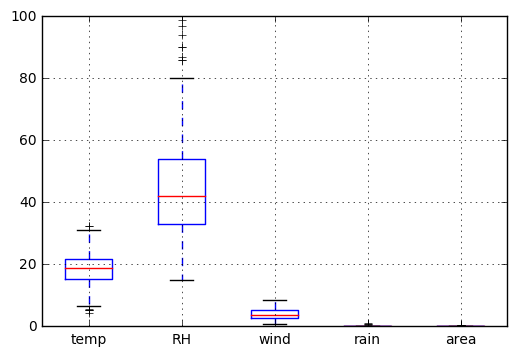

In [30]:
sdf_2.boxplot()

- 전체 데이터 중 wind의 최대수치가 sdf_1에 있고, 평균값이 sdf_1이 더 높은것으로 보아 바람이 더 많이 불수록 화재 피해 범위가 커지는것으로 판단된다.
- RH값들은 대체로 유사하나, 이상적으로 높은 수치들이 sdf_2의 분류에서 더 많이 기록된 것으로 보아 습도가 이상적으로 높을 경우에, 화재 피해 범위는 작아저는것으로 판단된다. 

## [Mission 5] 가장 영향이 높은 속성을 선택하여 단일변수 선형 회귀분석 수행

In [31]:
sdf = df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']]
log1p_val = np.log1p(sdf['area'])
sdf.loc[:, 'area'] = log1p_val
print sdf.head()
print
print sdf[140:145]

   FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

     FFMC    DMC     DC   ISI  temp  RH  wind  rain      area
140  90.9  126.5  686.5   7.0  21.9  39   1.8   0.0  0.385262
141  95.5   99.9  513.3  13.2  23.3  31   4.5   0.0  0.438255
142  90.1  108.0  529.8  12.5  21.2  51   8.9   0.0  0.476234
143  90.0   51.3  296.3   8.7  16.6  53   5.4   0.0  0.536493
144  95.5   99.9  513.3  13.2  23.8  32   5.4   0.0  0.570980


#### 상관계수 계산

In [32]:
print np.corrcoef(df['FFMC'],df['area'])[0][1]
print np.corrcoef(df['DMC'],df['area'])[0][1]
print np.corrcoef(df['DC'],df['area'])[0][1]
print np.corrcoef(df['ISI'],df['area'])[0][1]
print np.corrcoef(df['temp'],df['area'])[0][1]
print np.corrcoef(df['RH'],df['area'])[0][1]
print np.corrcoef(df['wind'],df['area'])[0][1]
print np.corrcoef(df['rain'],df['area'])[0][1]

0.0401220041586
0.0729942962511
0.0493832252989
0.00825768784123
0.0978441073417
-0.0755185634699
0.0123172768887
-0.00736572927929


- 상관계수 값이 temp가 약 0.09로 가장 큰 값을 보임

#### 선형 회귀 분석을 위한 scipy 모듈 import

In [33]:
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
%matplotlib inline

In [34]:
slope, intercept, r_value, p_value, std_err = stats.linregress(sdf['temp'].values, df['area'].values)

In [35]:
format = "%40s: %12.10f"
print format % ("slope", slope)
print format % ("intercept", intercept)
print format % ("r_value (Correlation Coefficient)", r_value)
print format % ("r-squared (Coefficient of Determination)", r_value**2)
print format % ("p_value (Hyperthesis Testing)", p_value)
print format % ("std_err (Standard Error)", std_err)

                                   slope: 1.0726276211
                               intercept: -7.4137515648
       r_value (Correlation Coefficient): 0.0978441073
r-squared (Coefficient of Determination): 0.0095734693
           p_value (Hyperthesis Testing): 0.0261014606
                std_err (Standard Error): 0.4807527963


- 선형 회귀 분석 방정식은 \\(y= intercept + slope * x \\)
    - 타겟 데이터에서의 식은  \\(y(area) = -7.4137515648 + 1.0726276211 * x(temp)\\)

## [Mission 6] 가장 영향이 높은 요인 두 개로 다변수 선형 회귀분석 수행

- 선형 회귀분석 성능이 좋은지 자신의 의견을 제시하시오

#### sklearn 모듈을 활용한 다중 변수 선형 회귀 사용

In [36]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [37]:
print np.corrcoef(df['FFMC'],df['area'])[0][1]
print np.corrcoef(df['DMC'],df['area'])[0][1]
print np.corrcoef(df['DC'],df['area'])[0][1]
print np.corrcoef(df['ISI'],df['area'])[0][1]
print np.corrcoef(df['temp'],df['area'])[0][1]
print np.corrcoef(df['RH'],df['area'])[0][1]
print np.corrcoef(df['wind'],df['area'])[0][1]
print np.corrcoef(df['rain'],df['area'])[0][1]

0.0401220041586
0.0729942962511
0.0493832252989
0.00825768784123
0.0978441073417
-0.0755185634699
0.0123172768887
-0.00736572927929


Mission5에서의 상관계수 계산 결과에 따르면 temp가 가장 계수가 높고, 그 다음은 DMC로 나타남(약 0.73)

In [38]:
sdf[['DMC','temp']].head()

,DMC,temp
0,26.2,8.2
1,35.4,18.0
2,43.7,14.6
3,33.3,8.3
4,51.3,11.4


In [39]:
X = zip(sdf['DMC'],sdf['temp'])
print X
y = sdf['area'].values

[(26.199999999999999, 8.1999999999999993), (35.399999999999999, 18.0), (43.700000000000003, 14.6), (33.299999999999997, 8.3000000000000007), (51.299999999999997, 11.4), (85.299999999999997, 22.199999999999999), (88.900000000000006, 24.100000000000001), (145.40000000000001, 8.0), (129.5, 13.1), (88.0, 22.800000000000001), (88.0, 17.800000000000001), (73.200000000000003, 19.300000000000001), (70.799999999999997, 17.0), (126.5, 21.300000000000001), (133.30000000000001, 26.399999999999999), (141.19999999999999, 22.899999999999999), (35.799999999999997, 15.1), (32.799999999999997, 16.699999999999999), (27.899999999999999, 15.9), (27.399999999999999, 9.3000000000000007), (129.5, 18.300000000000001), (78.5, 19.100000000000001), (96.299999999999997, 21.0), (110.90000000000001, 19.5), (139.40000000000001, 23.699999999999999), (142.40000000000001, 16.300000000000001), (117.90000000000001, 19.0), (126.5, 19.399999999999999), (145.40000000000001, 30.199999999999999), (149.30000000000001, 22.800000

In [40]:
regr = regr.fit(X,y)
print 'Coefficients:', regr.coef_
print 'Intercept:', regr.intercept_

Coefficients: [ 0.0011775   0.00678247]
Intercept: 0.852358519604


- 선형 회귀식  : \\(y = 0.8524 + (0.0012 * temp) + (0.0068 * dmc) \\)

#### 선형 회귀식과 데이터 scatter plot을 합쳐 놓으면 아래와 같다 

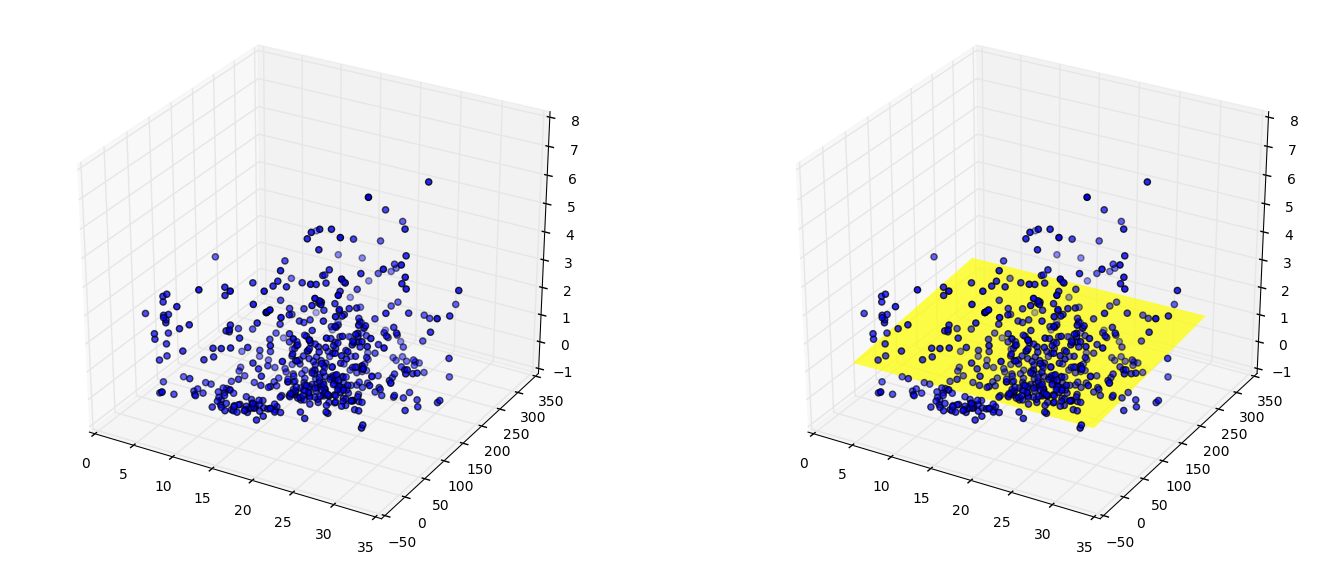

In [41]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(17, 7))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(sdf['temp'], sdf['DMC'], sdf['area'])

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(df['temp'], df['DMC'], sdf['area'])
# create x,y
xx, yy = np.meshgrid(range(int(df['temp'].min()), int(df['temp'].max())), range(int(df['DMC'].min()), int(df['DMC'].max())))
# calculate corresponding z
z = 0.8280 + 0.0036 * xx + 0.0018 * yy
ax2.plot_surface(xx, yy, z, rstride=1, cstride=1, linewidth=0, color="yellow", shade=False)

#### 선형 회귀분석식의 평면에 포함되는 scatter가 많기는 하나, 벗어나는 경우의 수가 무시할 수 없는 만큼 있으므로, 2개 변수를 사용한 선형 회귀분석은 신뢰하기 다소 어려운 부분이 있다. 

## [Mission 7] 가장 영향이 높은 요인 두 개로 다변수 로지스틱 회귀분석 수행

- area의 값의 편차가 너무 심하기 떄문에 그러한 편차를 줄이기 위하여 numpy.log1(자연로그) 사용
    - Calulates log(1+x)
    - http://docs.scipy.org/doc/numpy/reference/generated/numpy.log1p.html#numpy.log1p
- 새로운 Categorical Variable로서 0및 1을 지니는 'fire' 컬럼 생성
- 두 가지 부류로 나누는 기준은 log(1+area) 값이 50% percentile 이상인 것과 50 % percentile 이하인 것으로 정함
    - log(1+area) 값이 50% percentile 이상이면 'fire' 칼럼 값이 1
    - log(1+area) 값이 50% percentile 미만이면 'fire' 칼럼 값이 0
- 로지스틱 회귀분석에 의한 분류의 정확도를 최종적으로 출력하시오

In [42]:
sdf = sdf.assign(fire = Series(sdf.area >= sdf.area.median() ,index=sdf.index))

In [43]:
sdf.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fire
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,False
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,False
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,False
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,False
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,False


In [44]:
sdf['fire'] = sdf['fire'].map({False : 0, True :1})

In [45]:
sdf.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fire
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0


In [46]:
sdf = sdf[['DMC','temp','fire']]

In [47]:
attributes = sdf.iloc[:, 0:2]
fire_data = attributes.values
fire_data

array([[  26.2,    8.2],
       [  35.4,   18. ],
       [  43.7,   14.6],
       ..., 
       [  56.7,   21.2],
       [ 146. ,   25.6],
       [   3. ,   11.8]])

In [48]:
target_series = sdf.iloc[:, 2]
fire_target = target_series.values
fire_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0,

In [49]:
from sklearn.cross_validation import train_test_split
data_train, data_test, labels_train, labels_test = train_test_split(fire_data, fire_target, test_size=0.20)
print len(data_train), len(labels_train) 
print len(data_test), len(labels_test)

413 413
104 104


sklearn 모듈 import

In [50]:
from sklearn import linear_model
regr = linear_model.LogisticRegression()
regr.fit(data_train,labels_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
print 'Coefficients:', regr.coef_
print 'Intercept:', regr.intercept_

Coefficients: [[ 0.00146792  0.01656734]]
Intercept: [-0.51596141]


In [52]:
print data_test[0]
print data_test[0].reshape(1,-1)

[ 119.    18.9]
[[ 119.    18.9]]


In [53]:
print data_test[0], ":", labels_test[0]
print regr.predict(data_test[0].reshape(1,-1))[0]

[ 119.    18.9] : 1
0


- 로지스틱 회귀분석에 의한 분류 정확도

In [54]:
predicted = []
for i in range(0, len(data_test)):
    predicted.append(regr.predict(data_test[i].reshape(1,-1))[0] == labels_test[i])

total = len(predicted)
numTrue = 0
for i in range(0, total):
    if predicted[i]:
        numTrue = numTrue + 1
print float(numTrue) / total    

0.509615384615


분류 정확도가 50% 내외이므로 2개 변수만을 고려한 경우는 신뢰할 수 없다고 판단된다.

### Appendix

- 모든 특징들을 고려한 로지스틱 회귀분석

In [55]:
sdf = df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']]

In [56]:
sdf = sdf.assign(fire = Series(sdf.area >= sdf.area.median() ,index=sdf.index))

In [57]:
sdf = sdf[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain','fire']]

In [58]:
sdf.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,fire
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,False
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,False
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,False
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,False
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,False


In [59]:
sdf['fire'] = sdf['fire'].map({False : 0, True :1})

In [60]:
sdf.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,fire
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0


In [61]:
attributes = sdf.iloc[:, 0:8]
fire_data = attributes.values
fire_data

array([[  86.2,   26.2,   94.3, ...,   51. ,    6.7,    0. ],
       [  90.6,   35.4,  669.1, ...,   33. ,    0.9,    0. ],
       [  90.6,   43.7,  686.9, ...,   33. ,    1.3,    0. ],
       ..., 
       [  81.6,   56.7,  665.6, ...,   70. ,    6.7,    0. ],
       [  94.4,  146. ,  614.7, ...,   42. ,    4. ,    0. ],
       [  79.5,    3. ,  106.7, ...,   31. ,    4.5,    0. ]])

In [62]:
target_series = sdf.iloc[:, 8]
fire_target = target_series.values
fire_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0,

In [63]:
data_train, data_test, labels_train, labels_test = train_test_split(fire_data, fire_target, test_size=0.20)
print len(data_train), len(labels_train) 
print len(data_test), len(labels_test)

413 413
104 104


In [64]:
regr = linear_model.LogisticRegression()
regr.fit(data_train,labels_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
predicted = []
for i in range(0, len(data_test)):
    predicted.append(regr.predict(data_test[i].reshape(1,-1))[0] == labels_test[i])

total = len(predicted)
numTrue = 0
for i in range(0, total):
    if predicted[i]:
        numTrue = numTrue + 1
print float(numTrue) / total    

0.451923076923


로지스틱 회귀분석의 정확도는 모든 변수들을 고려하더라도 50% 내외의 수준으로 나타난다.